<a href="https://colab.research.google.com/github/tonykipkemboi/ReinforcementLearningTradingBot/blob/main/%24STOCK_ReinforcementLearningTradingBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
!pip3 install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines3 gym-anytrading gym

In [4]:
# Gym imports
import gym
import gym_anytrading

# Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mount MarketWatch Stock Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Download Data - STOCK_US_XNAS_TSLA.csv to Download Data - STOCK_US_XNAS_TSLA.csv


In [7]:
df = pd.read_csv('/content/Download Data - STOCK_US_XNAS_TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,06/18/2021,613.37,628.35,611.80,623.31,"24,560,910"
1,06/17/2021,601.89,621.47,601.34,616.60,"22,701,350"
2,06/16/2021,597.54,608.50,593.50,604.87,"22,144,131"
3,06/15/2021,616.69,616.79,598.23,599.36,"17,764,150"
4,06/14/2021,612.23,625.49,609.18,617.69,"20,423,980"


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-18,613.37,628.35,611.80,623.31,"24,560,910"
2021-06-17,601.89,621.47,601.34,616.60,"22,701,350"
2021-06-16,597.54,608.50,593.50,604.87,"22,144,131"
2021-06-15,616.69,616.79,598.23,599.36,"17,764,150"
2021-06-14,612.23,625.49,609.18,617.69,"20,423,980"


In [20]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=10)
#env.prices
#env.signal_features

# Build Environment

In [21]:
# Buy & Sell
env.action_space

Discrete(2)

info {'total_reward': -2.7299999999999045, 'total_profit': 0.7560730477240066, 'position': 1}


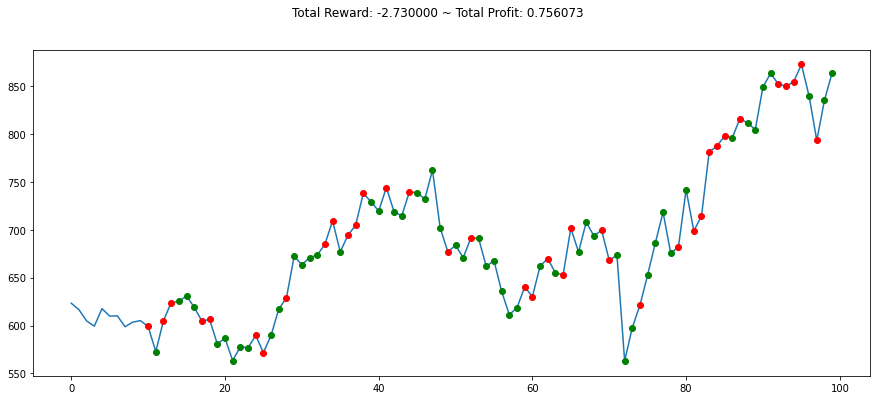

In [23]:
state = env.reset()

while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print('info', info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

#green-->buy
#red-->short

# Build Environment & Train

In [24]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=10)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

# Evaluation

In [29]:
env = gym.make('stocks-v0', df=df, frame_bound=(70,90), window_size=10)
obs = env.reset()

while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print('info', info)
    break

info {'total_reward': 0.0, 'total_profit': 1.17697666349951, 'position': 1}


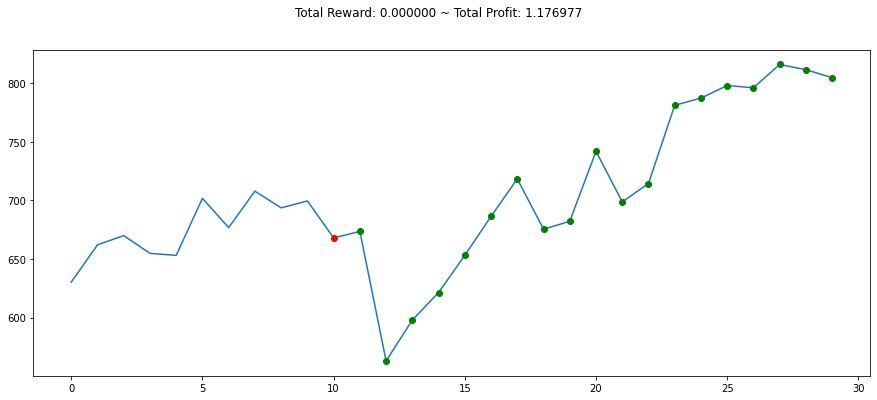

In [30]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

#green-->buy
#red-->short